In [1]:
# Data Scraping and Preparation

# 1- Scrape the data from the strongest competitor’s website
from bs4 import BeautifulSoup
import requests
import pandas as pd

weather_live_URL = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
response = requests.get(weather_live_URL)
html_raw = response.text

soup = BeautifulSoup(html_raw, 'html.parser')
# print(soup.prettify().encode('utf-8'))

table_rows = soup.find("table", class_ = "table table-striped table-responsive-md").find("tbody").find_all("tr")

(rank, x_class, date, region, start_time, max_time, end_time, movie) = ([], [], [], [], [], [], [], [])
for row in table_rows:
    row_data = row.find_all("td")
    rank.append(row_data[0].text)
    x_class.append(row_data[1].text)
    date.append(row_data[2].text)
    region.append(str(int(row_data[3].text)))
    start_time.append(row_data[4].text)
    max_time.append(row_data[5].text)
    end_time.append(row_data[6].text)
    movie.append(row_data[7].text)

rank_Series = pd.Series(rank)
xclass_Series = pd.Series(x_class)
date_Series = pd.Series(date)
region_Series = pd.Series(region)
stime_Series = pd.Series(start_time)
mtime_Series = pd.Series(max_time)
etime_Series = pd.Series(end_time)
movie_Series = pd.Series(movie)

Dict = {'rank':rank_Series, 'x_class':xclass_Series, 'date':date_Series, 'region':region_Series, 'start_time':stime_Series,
        'max_time':mtime_Series, 'end_time':etime_Series, 'movie':movie_Series}

Df = pd.DataFrame(Dict)


# Short Description..
'''
By using Beautiful_soup lib we can get the table content(rows) and for each row we can find all it,s
data to save them in Series(s) to make our Data Frame.
'''

Df

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [2]:
# 2- Clean and tidy the scraped data, deal with the missing records and drop the extra columns

# 1
try:
    Df.drop(['movie'], axis=1, inplace=True)
except:
    pass


# 2
from datetime import datetime
try:
    Df['start_time'] = Df['date'] + ' ' + Df['start_time']
    # or we can use date_time to convert it to Date time but i will convert it while working.
    # Df['start_time'] = pd.to_datetime(Df['date'] + ' ' + Df['start_time'])
    Df['max_time'] = Df['date'] + ' ' + Df['max_time']
    Df['end_time'] = Df['date'] + ' ' + Df['end_time']
    Df.drop(['date'], axis=1, inplace=True)
    Df = Df[['rank', 'x_class', 'start_time', 'max_time', 'end_time', 'region']]
except:
    pass


# 3
'Data frame is updated by Dropping Data Column and combine all time Columns with Data Column'
'Also we can Update any cell by using set_value function '
Df.set_value(0, 'region', 486)
'ex: Update at row=0 the region_cell=486'


# 4
'Now we can Replace any NaN cell with (0)'
Df.replace('NaN', 0)
'if exist NaN cell replace it with 0 for example'


# Short Description..
'''
First we can erase the un useful movie Column By using Drop Function.
and By using to_datetime function and concatination sign(+) we combine the time columns.
finally we can update some Cell value by using set_value function and Replace NaN cells with 0(for example).
'''

Df

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,rank,x_class,start_time,max_time,end_time,region
0,1,X28+,2003/11/04 19:29,2003/11/04 19:53,2003/11/04 20:06,486
1,2,X20+,2001/04/02 21:32,2001/04/02 21:51,2001/04/02 22:03,9393
2,3,X17.2+,2003/10/28 09:51,2003/10/28 11:10,2003/10/28 11:24,486
3,4,X17+,2005/09/07 17:17,2005/09/07 17:40,2005/09/07 18:03,808
4,5,X14.4,2001/04/15 13:19,2001/04/15 13:50,2001/04/15 13:55,9415
5,6,X10,2003/10/29 20:37,2003/10/29 20:49,2003/10/29 21:01,486
6,7,X9.4,1997/11/06 11:49,1997/11/06 11:55,1997/11/06 12:01,8100
7,8,X9.3,2017/09/06 11:53,2017/09/06 12:02,2017/09/06 12:10,2673
8,9,X9,2006/12/05 10:18,2006/12/05 10:35,2006/12/05 10:45,930
9,10,X8.3,2003/11/02 17:03,2003/11/02 17:25,2003/11/02 17:39,486


In [3]:
# 3- Scrape the extra data from a messy HTML.

import re

Nasa_URL = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
response = requests.get(Nasa_URL)
html_raw = response.text

soup = BeautifulSoup(html_raw, 'html.parser')
# print(soup2.prettify())

all_Data = soup.find("pre")

temp = all_Data.text
regex = '<a (.*)>(.*)</a>'
Data = re.sub(regex, '', temp)

(sd, st, ed, et, sf, ef, fl, fr, imp, CME_D, CME_T, cpa, width, speed, plots) = ([], [], [], [], [], [], [], [], [], [], [], [], [], [], [])
splited_Data = Data.splitlines()
for i in range(12, len(splited_Data) - 1):
    L = splited_Data[i].split(' ')
    LL = []
    for j in L:
        if j != '':
            LL.append(j)
    sd.append(LL[0].strip())
    st.append(LL[1].strip())
    ed.append(LL[2].strip())
    et.append(LL[3].strip()) 
    sf.append(LL[4].strip())  
    ef.append(LL[5].strip())
    fl.append(LL[6].strip())   
    fr.append(LL[7].strip())  
    imp.append(LL[8].strip())
    CME_D.append(LL[9].strip())
    CME_T.append(LL[10].strip())
    cpa.append(LL[11].strip())
    width.append(LL[12].strip())
    speed.append(LL[13].strip())
    plots.append(LL[14].strip())

sd_Series = pd.Series(sd)
st_Series = pd.Series(st)
ed_Series = pd.Series(ed)
et_Series = pd.Series(et)
sf_Series = pd.Series(sf)
ef_Series = pd.Series(ef)
fl_Series = pd.Series(fl)
fr_Series = pd.Series(fr)
imp_Series = pd.Series(imp)
CME_D_Series = pd.Series(CME_D)
CME_T_Series = pd.Series(CME_T)
cpa_Series = pd.Series(cpa)
width_Series = pd.Series(width)
speed_Series = pd.Series(speed)
plots_Series = pd.Series(plots)


Dict = {'Start_Date':sd_Series, 'Start_Time':st_Series, 'End_Date':ed_Series, 'End_Time':et_Series, 'Start_Frequency':sf_Series,
        'End_Frequency':ef_Series, 'Flare_Location':fl_Series, 'Flare_Region':fr_Series, 'Importance':imp_Series,
        'CME_Date':CME_D_Series, 'CME_Time':CME_T_Series, 'CPA':cpa_Series, 'Width':width_Series,
        'Speed':speed_Series, 'Plots':plots_Series}

Df1 = pd.DataFrame(Dict)

# Update the values in the the Last row.
Df1.set_value(517, 'Importance', '----')
Df1.set_value(517, 'CME_Date', '09/17')
Df1.set_value(517, 'CME_Time', '12:00')
Df1.set_value(517, 'CPA', 'Halo')
Df1.set_value(517, 'Width', '360')
Df1.set_value(517, 'Speed', '1385')
Df1.set_value(517, 'Plots', 'PHTX')

# Save it as CSV file.
Df1.to_csv(r'NASA.csv')


# Short Description..
'''
First we can Get the text in Pre Section in the HTML and Using REGEX we can erase all <a>
to split the data into Lines to get each row data to append them in Series(s) to make our Data Frame.
'''

Df1


C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_l

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA,Width,Speed,Plots
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


In [4]:
# 4- Tidy the extra data and deal with the missing observations, according to detailed instructions


# 1
for i in range(1, 518):
    if Df1.loc[i, 'Start_Date'][0] == '-':
        Df1.loc[i, 'Start_Date'] = Df1.loc[0, 'Start_Date']
    if Df1.loc[i, 'Start_Time'][0] == '-':
        Df1.loc[i, 'Start_Time'] = Df1.loc[0, 'Start_Time']
    if Df1.loc[i, 'End_Date'][0] == '-':
        Df1.loc[i, 'End_Date'] = Df1.loc[0, 'End_Date']
    if Df1.loc[i, 'End_Time'][0] == '-':
        Df1.loc[i, 'End_Time'] = Df1.loc[0, 'End_Time']
    if Df1.loc[i, 'Start_Frequency'][0] == '-':
        Df1.loc[i, 'Start_Frequency'] = Df1.loc[0, 'Start_Frequency']
    if Df1.loc[i, 'End_Frequency'][0] == '-':
        Df1.loc[i, 'End_Frequency'] = Df1.loc[0, 'End_Frequency']
    if Df1.loc[i, 'Flare_Location'][0] == '-':
        Df1.loc[i, 'Flare_Location'] = Df1.loc[0, 'Flare_Location']
    if Df1.loc[i, 'Flare_Region'][0] == '-':
        Df1.loc[i, 'Flare_Region'] = Df1.loc[0, 'Flare_Region']
    if Df1.loc[i, 'Importance'][0] == '-':
        Df1.loc[i, 'Importance'] = Df1.loc[0, 'Importance']
    if Df1.loc[i, 'CME_Date'][0] == '-':
        Df1.loc[i, 'CME_Date'] = Df1.loc[0, 'CME_Date']
    if Df1.loc[i, 'CME_Time'][0] == '-':
        Df1.loc[i, 'CME_Time'] = Df1.loc[0, 'CME_Time']
    if Df1.loc[i, 'CPA'][0] == '-':
        Df1.loc[i, 'CPA'] = Df1.loc[0, 'CPA']
    if Df1.loc[i, 'Width'][0] == '-':
        Df1.loc[i, 'Width'] = Df1.loc[0, 'Width']
    if Df1.loc[i, 'Speed'][0] == '-':
        Df1.loc[i, 'Speed'] = Df1.loc[0, 'Speed']
    if Df1.loc[i, 'Plots'][0] == '-':
        Df1.loc[i, 'Plots'] = Df1.loc[0, 'Plots']



# 2
is_halo = []
for i in range(0, 518):
    if Df1.loc[i, 'CPA'] == 'Halo':
        is_halo.append('True')
        Df1.loc[i, 'CPA'] = 'NaN'
    else:
        is_halo.append('False')

Df1['is_halo'] = is_halo



# 3
width_lower = []
for i in range(0, 518):
    if Df1.loc[i, 'Width'][0] == '>':
        Df1.loc[i, 'Width'] = Df1.loc[i, 'Width'][1:]
        width_lower.append('True')
    else:
        width_lower.append('False')

Df1['Width_Lower'] = width_lower


# 4
try:
    (Start_DT, End_DT, CME_DT) = ([], [], [])
    for i in range(0, 518):
        Start_DT.append(Df1.loc[i, 'Start_Date'] + ' ' + Df1.loc[i, 'Start_Time'])
        End_DT.append(Df1.loc[i, 'End_Date'] + ' ' + Df1.loc[i, 'End_Time'])
        CME_DT.append(Df1.loc[i, 'CME_Date'] + ' ' + Df1.loc[i, 'CME_Time'])
    drops = ['Start_Date', 'Start_Time', 'End_Date', 'End_Time', 'CME_Date', 'CME_Time']
    for i in drops:
        Df1.drop([i], axis=1, inplace=True)
    Df1['Start_DateTime'] = Start_DT
    Df1['End_DateTime'] = End_DT
    Df1['CME_DateTime'] = CME_DT
except:
    pass

Df1 = Df1[['Start_DateTime', 'End_DateTime', 'Start_Frequency', 'End_Frequency', 'Flare_Location',
               'Flare_Region', 'Importance', 'CME_DateTime', 'CPA', 'Width', 'Speed', 'Plots', 'is_halo', 'Width_Lower']]

# Description..
'''
First i replace missing values with accurate value format for each Column
then i created new Series to Halo CPA to Replace it with NAN by using loc function
and the Same idea for Width_Lower i created column for the Lower Width and i deleted the Lower sign
from the string.
then i combined the Date and Time columns in one Column and by using Drop Function i Drop the Date
and Time columns.
'''


Df1

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,Plots,is_halo,Width_Lower
0,1997/04/01 14:00,04/01 14:15,8000,4000,S25E16,8026,M1.3,04/01 15:18,74,79,312,PHTX,False,False
1,1997/04/07 14:30,04/07 17:30,11000,1000,S28E19,8027,C6.8,04/07 14:27,NaN,360,878,PHTX,True,False
2,1997/05/12 05:15,05/14 16:00,12000,80,N21W08,8038,C1.3,05/12 05:30,NaN,360,464,PHTX,True,False
3,1997/05/21 20:20,05/21 22:00,5000,500,N05W12,8040,M1.3,05/21 21:00,263,165,296,PHTX,False,False
4,1997/09/23 21:53,09/23 22:16,6000,2000,S29E25,8088,C1.4,09/23 22:02,133,155,712,PHTX,False,False
5,1997/11/03 05:15,11/03 12:00,14000,250,S20W13,8100,C8.6,11/03 05:28,240,109,227,PHTX,False,False
6,1997/11/03 10:30,11/03 11:30,14000,5000,S16W21,8100,M4.2,11/03 11:11,233,122,352,PHTX,False,False
7,1997/11/04 06:00,11/05 04:30,14000,100,S14W33,8100,X2.1,11/04 06:10,NaN,360,785,PHTX,True,False
8,1997/11/06 12:20,11/07 08:30,14000,100,S18W63,8100,X9.4,11/06 12:10,NaN,360,1556,PHTX,True,False
9,1997/11/27 13:30,11/27 14:00,14000,7000,N17E63,8113,X2.6,11/27 13:56,98,91,441,PHTX,False,False


In [5]:
# Data Analysis
# 1- Replicate the data published by the strongest competitor using the extra data 
     # obtained from messy HTML. The student should discuss in detail the criteria 
     # she/he used to replicate the data and how she/he implemented such criteria.


# Get top 50 from NASA based on Importance Column.
get_top_50 = []
for i in range(0, 518):
    tmp = Df1.loc[i, 'Importance']
    if tmp[0] == 'X':
        get_top_50.append( ( float(tmp[1:]) , i) )

# Sort Based on Importance Column.
get_top_50.sort(reverse=True)

# Get top 50 indicies.
inds = []
for i in get_top_50:
    inds.append(i[1])

# New Frame Contain top 50 From NASA DaTA based on Importance Column.
NASA_top50 = Df1.iloc[inds[0:50], :]


# Description..
'''
- we can replicate the 2 DataFrames by using the Shared Column from the 2 Dataframes(Importance, x_class) as Keys.
- So we can Assume that the Importance Column is foreign Key in Nasa DataFrame and x_class is Primary Key in
Weather Live Dataframe so we can Replicate the 2 DataFrames.
'''

NASA_top50

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,Plots,is_halo,Width_Lower
240,2003/11/04 20:00,11/04 24:00,10000,200,S19W83,10486,X28.,11/04 19:54,NaN,360,2657,PHTX,True,False
117,2001/04/02 22:05,04/03 02:30,14000,250,N19W72,9393,X20.,04/02 22:06,261,244,2505,PHTX,False,False
233,2003/10/28 11:10,10/29 24:00,14000,40,S16E08,10486,X17.,10/28 11:30,NaN,360,2459,PHTX,True,False
126,2001/04/15 14:05,04/16 13:00,14000,40,S20W85,9415,X14.,04/15 14:06,245,167,1199,PHTX,False,False
234,2003/10/29 20:55,10/29 24:00,11000,500,S15W02,10486,X10.,10/29 20:54,NaN,360,2029,PHTX,True,False
8,1997/11/06 12:20,11/07 08:30,14000,100,S18W63,8100,X9.4,11/06 12:10,NaN,360,1556,PHTX,True,False
514,2017/09/06 12:05,09/07 08:00,16000,70,S08W33,12673,X9.3,09/06 12:24,NaN,360,1571,PHTX,True,False
328,2006/12/05 10:50,12/05 20:00,14000,250,S07E68,10930,X9.0,04/01 15:18,74,79,312,PHTX,False,False
515,2017/09/10 16:02,09/11 06:50,16000,150,S09W92,8026,X8.3,09/10 16:00,NaN,360,3163,PHTX,True,False
237,2003/11/02 17:30,11/03 01:00,12000,250,S14W56,10486,X8.3,11/02 17:30,NaN,360,2598,PHTX,True,False


In [6]:
# 2- Integrate the two datasets for just the top 50 space phenomena
      # (top 50 solar flare events as mentioned in the competitor’s website), applying the best 
      # matching between the two data sets. discuss the best 
      # matching between the datasets and how such matching might lead to losing
      # some records. Then, the student should identify the lost records (if any) and 
      # comment on the accuracy of the analysis.

def Get_Matches():
    (Appear, Best_Matches, ret) = ([], [], [])
    
    # Loop through all Data in Nasa to prepare the New column in this Data.
    for i in range(0, 518):
        NASA_cls = Df1.loc[i, 'Importance']
        # if Not start with X
        if NASA_cls[0] != 'X':
            Appear.append('False')
            continue
        NASA_cls = NASA_cls[1:]
        ch = 0
        for j in range(0, 50):
            Live_cls = Df.loc[j, 'x_class']
            Live_cls = Live_cls[1:]
            if Live_cls[len(Live_cls) - 1] == '+':
                Live_cls = Live_cls[0:len(Live_cls)-1]
            if float(Live_cls) < float(NASA_cls): 
                break
            if float(Live_cls) != float(NASA_cls):
                continue
            cnt = 1
            ch = 1
            # Check Similiarty of The cur Row.
            if Df1.loc[i, 'Start_DateTime'].split(' ')[0] == Df.loc[j, 'start_time'].split(' ')[0]:
                cnt = cnt + 1
            if Df1.loc[i, 'Flare_Region'] == Df.loc[j, 'region']:
                cnt = cnt + 1
            temp = Df.loc[j, 'start_time'].split(' ')[1]
            if Df1.loc[i, 'Start_DateTime'].split(' ')[1] == temp:
                cnt = cnt + 1
            temp = Df.loc[j, 'end_time'].split(' ')[1]
            if Df1.loc[i,'End_DateTime'].split(' ')[1] == temp:
                cnt = cnt + 1
            temp = Df.loc[j, 'end_time'].split(' ')[0]
            for k in range(0, len(temp)):
                if temp[k] == '/':
                    st_ind = k + 1
                    break
            temp = temp[st_ind:]
            if Df1.loc[i,'End_DateTime'].split(' ')[0] == temp:
                cnt = cnt + 1
            
            Best_Matches.append((cnt, i))
        if ch == 0:
            Appear.append('False')
        else:
            Appear.append('True')
    
    # Sort The Matches to get the Best.
    Best_Matches.sort(reverse=True)
    for i in range(0, len(Best_Matches)):
        if Best_Matches[i][0] != Best_Matches[0][0]:
            break
        ret.append(Best_Matches[i][1])
    
    # Create New Column Called Weather_Live_Appear in NASA dataset to know if this Class is on Weather Dataset or not.
    Df1['Weather_Live_Appear'] = Appear
    return ret
            
# Rows indicies which has the best matches..
inds = Get_Matches()


# Description..
'''
First i iterate through the Nasa Dataset and foreach row i cntl+find all it,s values[Importance, Start_date_time , End_Date_time and region] in the other dataset in each row too
then i save the number of matches in array to sort it to get the best matches.
'''

print('Best_Matches in Nasa to weather Live Dataset are ')
Df1.iloc[inds, :]

Best_Matches in Nasa to weather Live Dataset are 


C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,Width,Speed,Plots,is_halo,Width_Lower,Weather_Live_Appear
135,2001/08/25 16:50,08/25 23:00,8000,170,S17E34,9591,X5.3,08/25 16:50,NaN,360,1433,PHTX,True,False,True
104,2000/11/26 17:00,11/26 17:15,14000,7000,N18W38,9236,X4.0,11/26 17:06,NaN,360,980,PHTX,True,False,True
19,1998/05/06 08:25,05/06 08:35,14000,5000,S11W65,8210,X2.7,05/06 08:29,309,190,1099,PHTX,False,False,True


C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


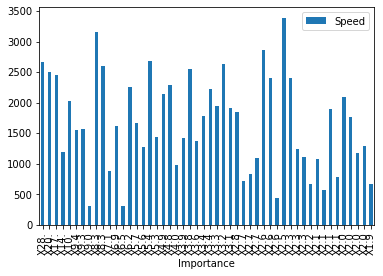

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


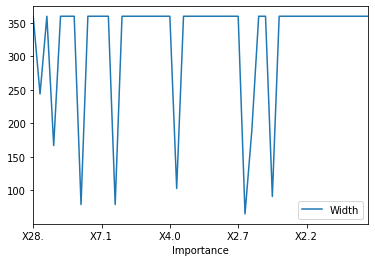

In [8]:
# 3- Plot attributes of the aforementioned space phenomena over time. Use 
     # graphical elements to indicate the top 50. From the plot, the student should 
     # comment on the value of some attributes with respect to the top 50 phenomena. 

# Description..
'''
1 - the intent of plots is depended on solar classes(imp) in the top 50 Nasa Dataset versus Width and Speed.
2 - the plots describe the variation of width and speed for each class of solar flares.
3 - the varience of speed between solar class(imp) is High but the varience in width not high as speed between solar class.
'''

import matplotlib.pyplot as plt

# ex: Plot relation between solar_classes(imp) and Speed.
NASA_top50['Speed'] = pd.to_numeric(NASA_top50['Speed'])
NASA_top50.plot(kind='bar',x='Importance',y='Speed')
plt.show()

# another_example: Plot relation between Width and solar_classes(imp).
NASA_top50['Width'] = pd.to_numeric(NASA_top50['Width'])
ax = plt.gca()
NASA_top50.plot(kind='line',x='Importance',y='Width',ax=ax)
plt.show()
